## Multiclass Classification: Wine Dataset
https://archive.ics.uci.edu/ml/datasets/wine

** Dataset Information: **

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

** Attribute Information: (13 features and 1 class)**

Class: class 1 (59), class 2 (71), class 3 (48)

1. Alcohol (class)
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

** Objective of this project **

Using chemical analysis (features) determine the origin of wines (class, 1-3)

## Data

In [108]:
options(warn=-1)
# Load Data
df  <- read.csv('Wine_data.csv')

In [109]:
# Inspect Data
head(df,3)
colnames(df)[1] <- 'label' #class -> label

Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [110]:
dim(df)

[1] 178  14

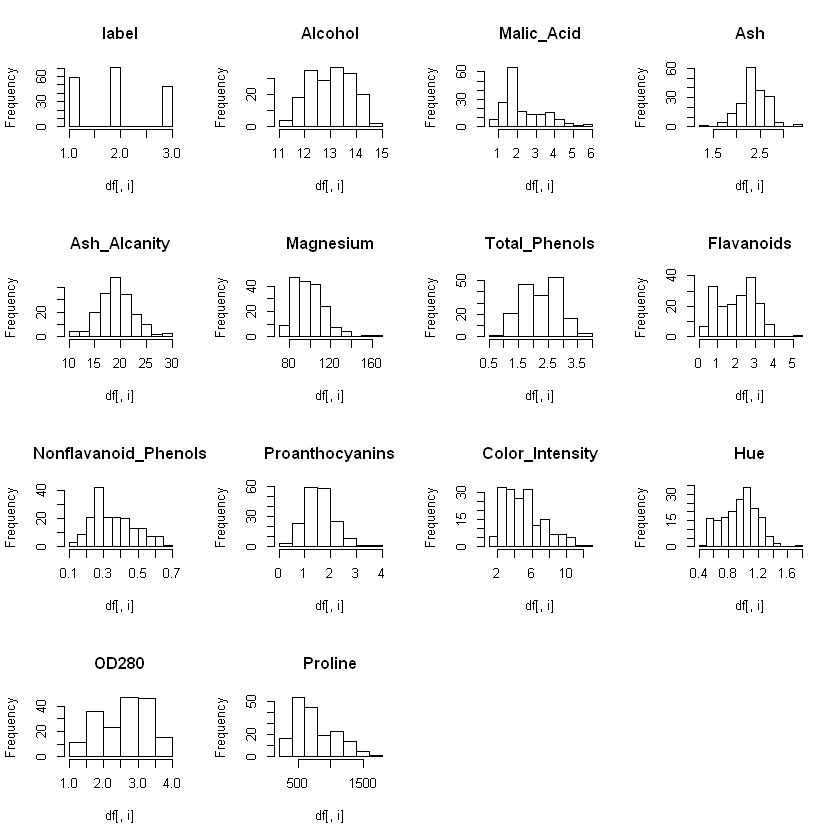

In [111]:
par(mfrow=c(4,4))
for(i in 1:14) {
    hist(df[,i], main=names(df)[i])
}

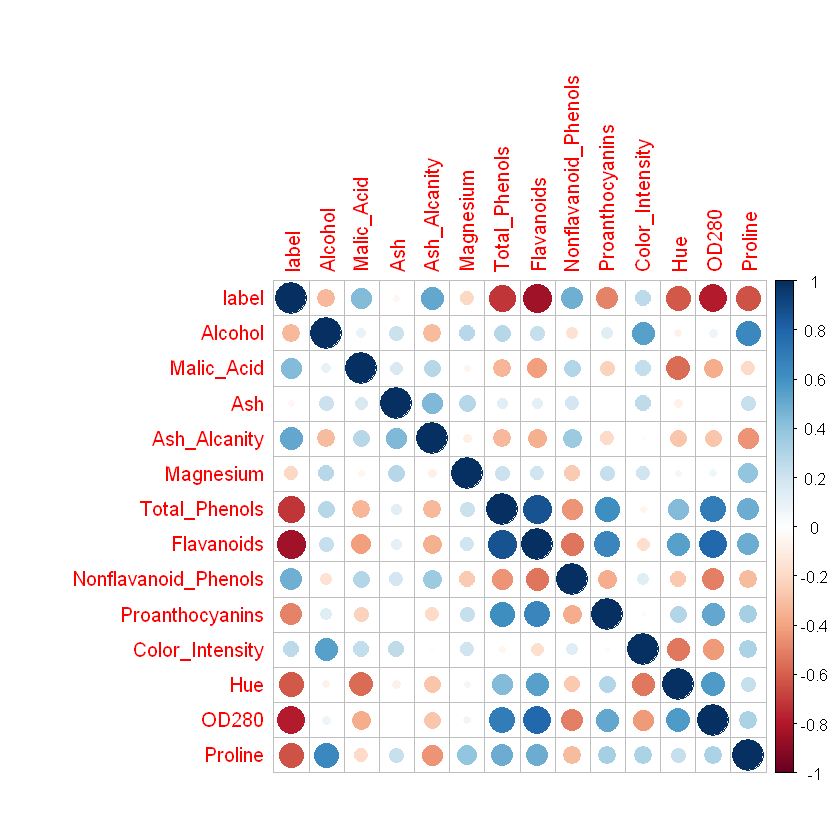

In [112]:
library(corrplot)
corrplot(cor(df), method="circle")

In [113]:
str(df)

'data.frame':	178 obs. of  14 variables:
 $ label               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Ash_Alcanity        : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280               : num  3.92 3

In [114]:
summary(df)

     label          Alcohol        Malic_Acid         Ash       
 Min.   :1.000   Min.   :11.03   Min.   :0.740   Min.   :1.360  
 1st Qu.:1.000   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210  
 Median :2.000   Median :13.05   Median :1.865   Median :2.360  
 Mean   :1.938   Mean   :13.00   Mean   :2.336   Mean   :2.367  
 3rd Qu.:3.000   3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558  
 Max.   :3.000   Max.   :14.83   Max.   :5.800   Max.   :3.230  
  Ash_Alcanity     Magnesium      Total_Phenols     Flavanoids   
 Min.   :10.60   Min.   : 70.00   Min.   :0.980   Min.   :0.340  
 1st Qu.:17.20   1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205  
 Median :19.50   Median : 98.00   Median :2.355   Median :2.135  
 Mean   :19.49   Mean   : 99.74   Mean   :2.295   Mean   :2.029  
 3rd Qu.:21.50   3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875  
 Max.   :30.00   Max.   :162.00   Max.   :3.880   Max.   :5.080  
 Nonflavanoid_Phenols Proanthocyanins Color_Intensity       Hue        
 Min.   :0.

In [115]:
table(df$label) #imbalanced labels


 1  2  3 
59 71 48 

In [116]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [117]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Encode Label **

In [118]:
df$label = factor(df$label, labels=c(1,2,3))
table(df$label)
str(df)


 1  2  3 
59 71 48 

'data.frame':	178 obs. of  14 variables:
 $ label               : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Ash_Alcanity        : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280 

** Split Train Test Sets **

In [119]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [120]:
# standardize data
label_col  = 1
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

 label     Alcohol          Malic_Acid           Ash          
 1:47   Min.   :-1.9510   Min.   :-1.3060   Min.   :-3.61040  
 2:57   1st Qu.:-0.8246   1st Qu.:-0.6484   1st Qu.:-0.56458  
 3:38   Median : 0.0571   Median :-0.4155   Median :-0.02068  
        Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
        3rd Qu.: 0.8572   3rd Qu.: 0.6053   3rd Qu.: 0.72264  
        Max.   : 2.2911   Max.   : 3.1787   Max.   : 3.17018  
  Ash_Alcanity       Magnesium       Total_Phenols        Flavanoids     
 Min.   :-2.5580   Min.   :-2.1076   Min.   :-2.05932   Min.   :-1.7139  
 1st Qu.:-0.7313   1st Qu.:-0.7674   1st Qu.:-0.88673   1st Qu.:-0.8236  
 Median :-0.1029   Median :-0.1326   Median :-0.09976   Median : 0.0869  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.6278   3rd Qu.: 0.5727   3rd Qu.: 0.80526   3rd Qu.: 0.8118  
 Max.   : 3.1121   Max.   : 4.3816   Max.   : 2.50513   Max.   : 3.0415  
 Nonflavanoid_Phenols Proanthocyanins    

## Baseline Model


Call:
summary.resamples(object = results)

Models: lda, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm 
Number of resamples: 5 

Accuracy 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda     0.9310345 0.9629630 0.9666667 0.9721328 1.0000000 1.0000000    0
glmnet  1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000    0
svm     1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000    0
knn     0.9333333 0.9629630 0.9642857 0.9580770 0.9642857 0.9655172    0
nb      0.9259259 1.0000000 1.0000000 0.9851852 1.0000000 1.0000000    0
cart    0.7857143 0.8214286 0.9259259 0.8928207 0.9310345 1.0000000    0
c50     0.8965517 0.9259259 0.9285714 0.9502098 1.0000000 1.0000000    0
bagging 0.9285714 0.9310345 0.9629630 0.9573709 0.9642857 1.0000000    0
rf      0.9310345 1.0000000 1.0000000 0.9862069 1.0000000 1.0000000    0
gbm     0.9310345 1.0000000 1.0000000 0.9862069 1.0000000 1.0000000    0

Kappa 
             Min.   1st Qu.    Median      Mea

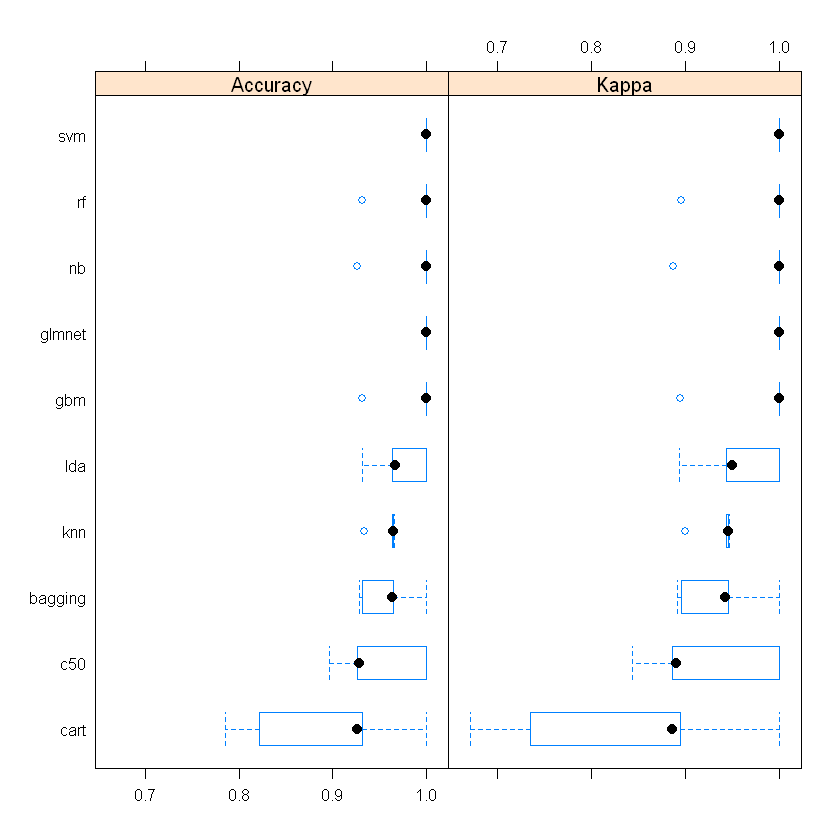

In [121]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"

# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# Logistic Regression
#set.seed(seed)
#fit.glm <- train(label~., data=train_set, method="glm", 
#                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(lda=fit.lda, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)


#results <- resamples(list(lda=fit.lda, logistic=fit.glm, glmnet=fit.glmnet,
#    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
#    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))

## Parameter Tuning
4 best algorithms: glmnet, svm, rf, gbm

tuning parameters: http://topepo.github.io/caret/available-models.html

In [122]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: GLMNET

glmnet 

142 samples
 13 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 114, 114, 112, 113, 115 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.000   0.9716566  0.9567637
  0.001   0.9790640  0.9679670
  0.002   0.9790640  0.9679670
  0.003   0.9790640  0.9679670
  0.004   0.9862069  0.9787156
  0.005   0.9931034  0.9894545
  0.006   0.9931034  0.9894545
  0.007   0.9931034  0.9894545
  0.008   0.9856960  0.9781100
  0.009   0.9856960  0.9781100
  0.010   0.9856960  0.9781100
  0.011   0.9856960  0.9781100
  0.012   0.9856960  0.9781100
  0.013   0.9856960  0.9781100
  0.014   0.9856960  0.9781100
  0.015   0.9856960  0.9781100
  0.016   0.9856960  0.9781100
  0.017   0.9856960  0.9781100
  0.018   0.9856960  0.9781100
  0.019   0.9856960  0.9781100
  0.020   0.9856960  0.9781100
  0.021   0.9856960  0.9781100
  0.022   0.9856960  0.9781100
  0.023   0.9856960  0.9781100
  0.024  

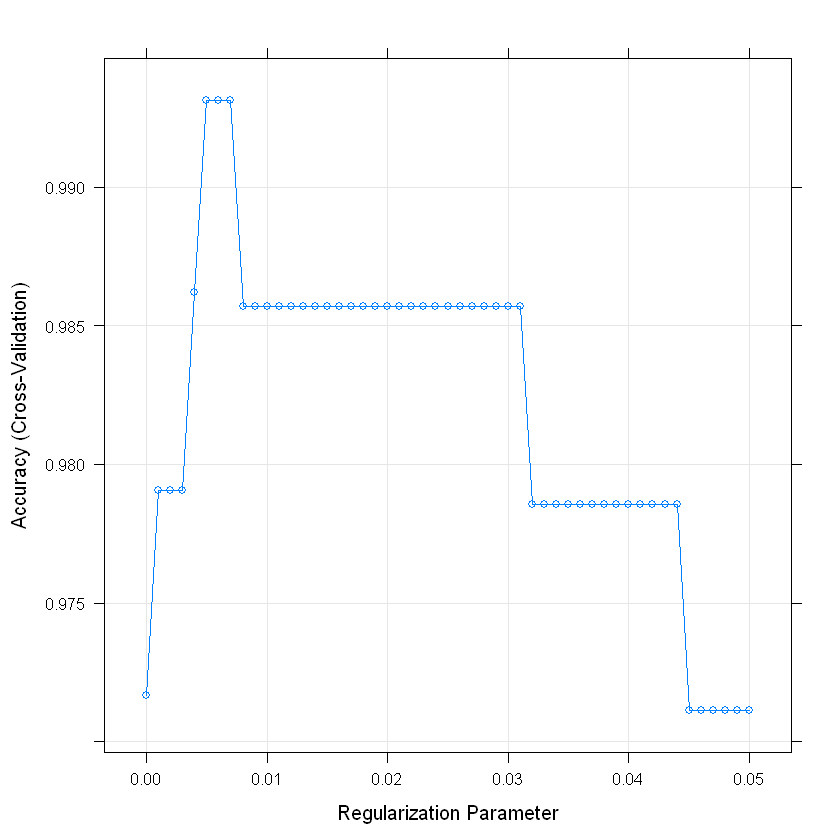

In [123]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = 1,lambda = seq(0,0.05,by = 0.001))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2. Support Vector Machine 

Support Vector Machines with Radial Basis Function Kernel 

142 samples
 13 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 114, 114, 112, 113, 115 
Resampling results across tuning parameters:

  sigma  C     Accuracy   Kappa    
  0.01    0.1  0.4911202  0.1578008
  0.01    1.0  0.9928571  0.9892514
  0.01    2.0  0.9928571  0.9892514
  0.01    4.0  0.9928571  0.9892514
  0.01    8.0  0.9928571  0.9892514
  0.01   10.0  0.9861905  0.9791843
  0.01   12.0  0.9795238  0.9689812
  0.01   16.0  0.9866667  0.9797297
  0.10    0.1  0.9514103  0.9251920
  0.10    1.0  0.9931034  0.9893186
  0.10    2.0  0.9864368  0.9791145
  0.10    4.0  0.9864368  0.9791145
  0.10    8.0  0.9864368  0.9791145
  0.10   10.0  0.9864368  0.9791145
  0.10   12.0  0.9864368  0.9791145
  0.10   16.0  0.9864368  0.9791145
  1.00    0.1  0.4013830  0.0000000
  1.00    1.0  0.5611585  0.2814123
  1.00    2.0  0.6251980  0.3905297
  1.00    4.0

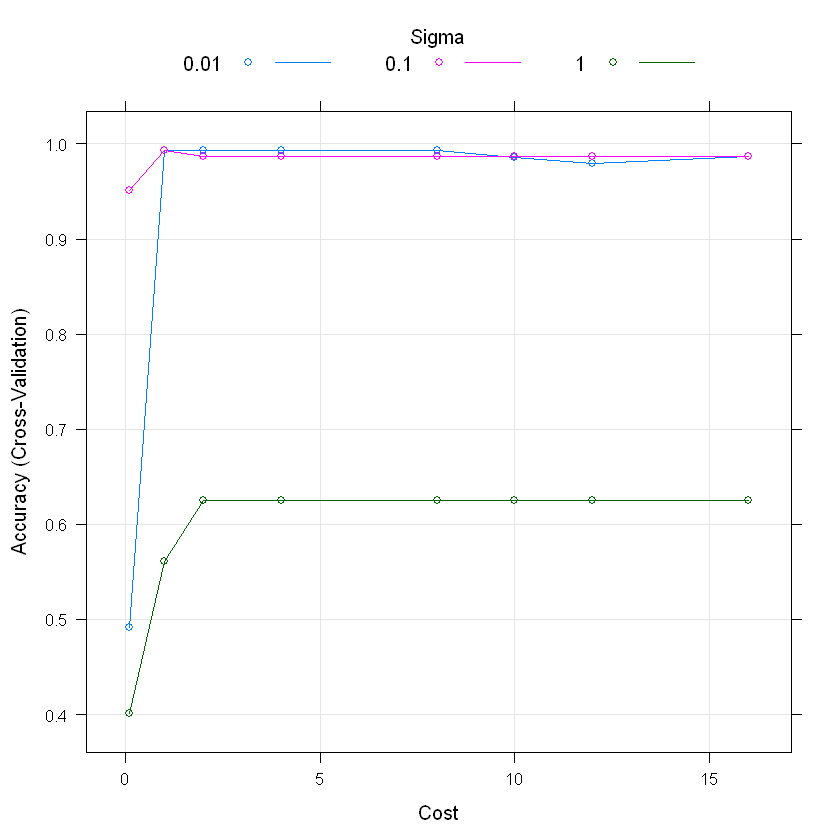

In [124]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.01,0.1,1), .C=c(0.1,1,2,4,8,10,12,16))
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 3: Random Forest

Random Forest 

142 samples
 13 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 114, 114, 112, 113, 115 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.9931034  0.9894545
   2    0.9862069  0.9790991
   3    0.9862069  0.9790991
   4    0.9787995  0.9677546
   5    0.9787995  0.9677546
   6    0.9787995  0.9677546
   7    0.9787995  0.9677546
   8    0.9787995  0.9677546
   9    0.9713921  0.9563143
  10    0.9713921  0.9563143

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.


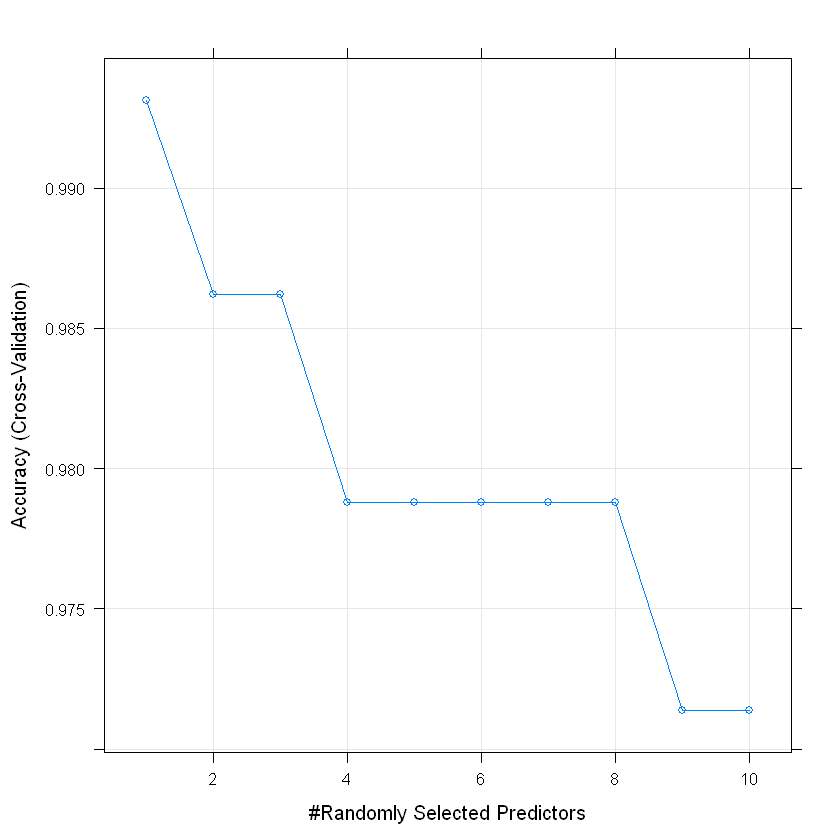

In [125]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(.mtry=c(1:10))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

#### Model 4: Stochastic Gradient Boosting

Stochastic Gradient Boosting 

142 samples
 13 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 114, 114, 112, 113, 115 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.01       1                  10              200      0.9642492  0.9455451
  0.01       1                  10              300      0.9785532  0.9673408
  0.01       1                  10              400      0.9785532  0.9673408
  0.01       1                  10              500      0.9859606  0.9786853
  0.01       1                  20              200      0.9719212  0.9576842
  0.01       1                  20              300      0.9719212  0.9576842
  0.01       1                  20              400      0.9719212  0.9576842
  0.01       1                  20              500      0.9719212  0.9576842
  0.01       3                  10              200      0.9

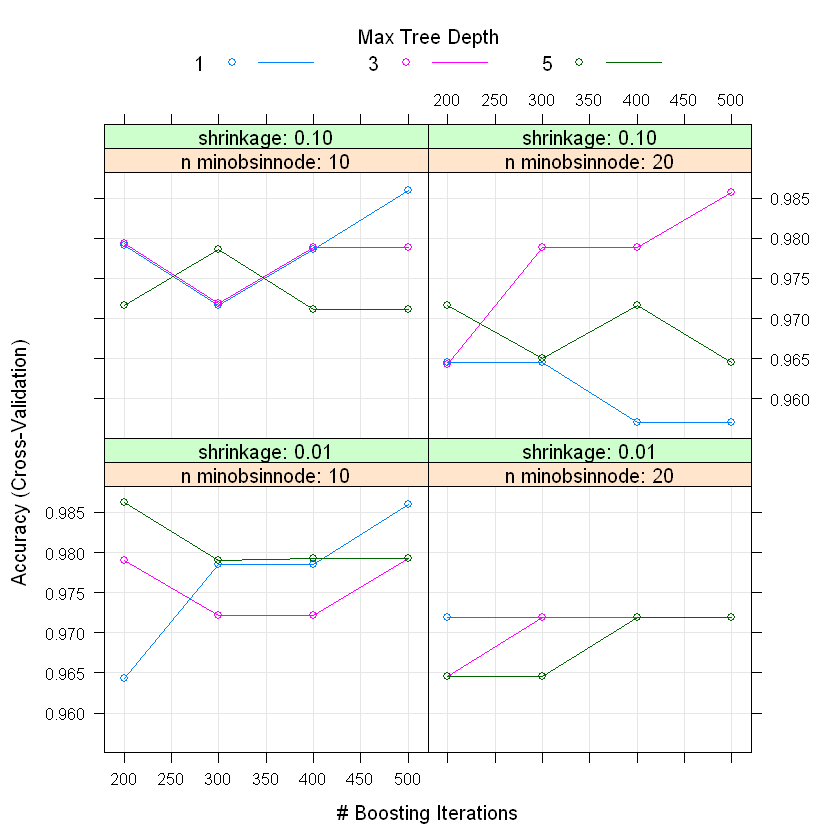

In [126]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(200,300,400,500),
                       interaction.depth = c(1, 3, 5),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.1 and C = 1

In [127]:
library(kernlab)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",cross=10,
                    kpar=list(sigma=0.1), C=1)
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.1 

Number of Support Vectors : 67 

Objective Function Value : -10.4742 -4.6813 -11.1596 
Training error : 0 
Cross validation error : 0.007143 


In [128]:
predictions = predict(final.model, newdata = train_set[-label_col])
confusionMatrix(predictions, train_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 47  0  0
         2  0 57  0
         3  0  0 38

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9744, 1)
    No Information Rate : 0.4014     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity             1.000   1.0000   1.0000
Specificity             1.000   1.0000   1.0000
Pos Pred Value          1.000   1.0000   1.0000
Neg Pred Value          1.000   1.0000   1.0000
Prevalence              0.331   0.4014   0.2676
Detection Rate          0.331   0.4014   0.2676
Detection Prevalence    0.331   0.4014   0.2676
Balanced Accuracy       1.000   1.0000   1.0000

#### Save and load the final model

In [129]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [130]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.1 

Number of Support Vectors : 67 

Objective Function Value : -10.4742 -4.6813 -11.1596 
Training error : 0 
Cross validation error : 0.007143 


#### Final Model Evaluation with Test set

In [131]:
predictions = predict(final.model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 12  0  0
         2  0 13  0
         3  0  1 10

Overall Statistics
                                          
               Accuracy : 0.9722          
                 95% CI : (0.8547, 0.9993)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 9.861e-14       
                                          
                  Kappa : 0.9581          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9286   1.0000
Specificity            1.0000   1.0000   0.9615
Pos Pred Value         1.0000   1.0000   0.9091
Neg Pred Value         1.0000   0.9565   1.0000
Prevalence             0.3333   0.3889   0.2778
Detection Rate         0.3333   0.3611   0.2778
Detection Prevalence   0.3333   0.3611   0.3056
Balanced Accuracy      1.0000   0.9643   0.9808

## Summary

- Best model: **SVM** w/ param: sigma=0.1, C=1


- Accuracy of test set: **97.2%**